In [1]:
## IMPORTS and GLOBAL DEFINITIONS ##
import ROOT
import pyLCIO as LCIO
import numpy as np
from pprint import pprint

PI = np.pi

# Functionality
ROOT.EnableImplicitMT()  # Multithreading

# Stylization
ROOT.gStyle.SetOptTitle(0)  # Remove title from hists so you can add a customized one
# ROOT.gStyle.SetTitleTextColor(17)
# ROOT.gStyle.SetTitleAlign(23)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetCanvasColor(1)
ROOT.gStyle.SetTitleColor(17, "XYZ")
ROOT.gStyle.SetTitleSize(.023, "XYZ")
ROOT.gStyle.SetTitleOffset(1.2, "X")
ROOT.gStyle.SetTitleOffset(1, "Y")
ROOT.gStyle.SetLabelColor(17, "XYZ")
ROOT.gStyle.SetLabelOffset()
ROOT.gStyle.SetNdivisions(103, "XY")
ROOT.gStyle.SetAxisColor(17, "XYZ")
ROOT.gStyle.SetLabelSize(0.02, "XYZ")
ROOT.gStyle.SetPalette(ROOT.kDarkBodyRadiator)
ROOT.gStyle.SetCanvasPreferGL(1)

Welcome to JupyROOT 6.26/06
Loading LCIO ROOT dictionaries ...


In [3]:
# Set up file.
in_file = "/collab/project/snowmass21/data/muonc/fmeloni/DataMuC_MuColl10_v0A/v2/reco/photonGun_E_50_250/photonGun_E_50_250_reco_0.slcio" # File to read.
# collections = ["ECalBarrelCollection", "ECalEndcapCollection"]  # What collections to include?
collections = ["ECalBarrelCollection"]  # What collections to include?

# Use reader on file
reader = LCIO.IOIMPL.LCFactory.getInstance().createLCReader(LCIO.IO.LCReader.directAccess)   # Create LCIO file reader.
reader.setReadCollectionNames(collections)  # Set collections to be read.
reader.open(in_file)    # Open collections.

In [2]:
# Create histogram object.
nbins = 900
low = -2400
high = 2400
h1 = ROOT.TH2D(name="xy_cal", 
               title="#bf{T#kern[-.015]{ransverse} Cross-Section};#bf{#it{x}} #color[12]{#[]{mm}};#bf{#it{y}} #color[12]{#[]{mm}}",
               nbinsx=nbins,
               xlow=low,
               xup=high,
               nbinsy=nbins,
               ylow=low,
               yup=high
               )

In [4]:
## FILL HISTOGRAM ##
for event in reader:
    for collection_tuple in event:
        collection = collection_tuple[1]
        if collection.getNumberOfElements() != 0:
            for simhit in collection:
                position = simhit.getPosition()
                x = position[0]
                y = position[1]
                z = position[2]
                energy = simhit.getEnergy()
                time = simhit.getTimeCont(0)
                h1.Fill(x, y, energy)

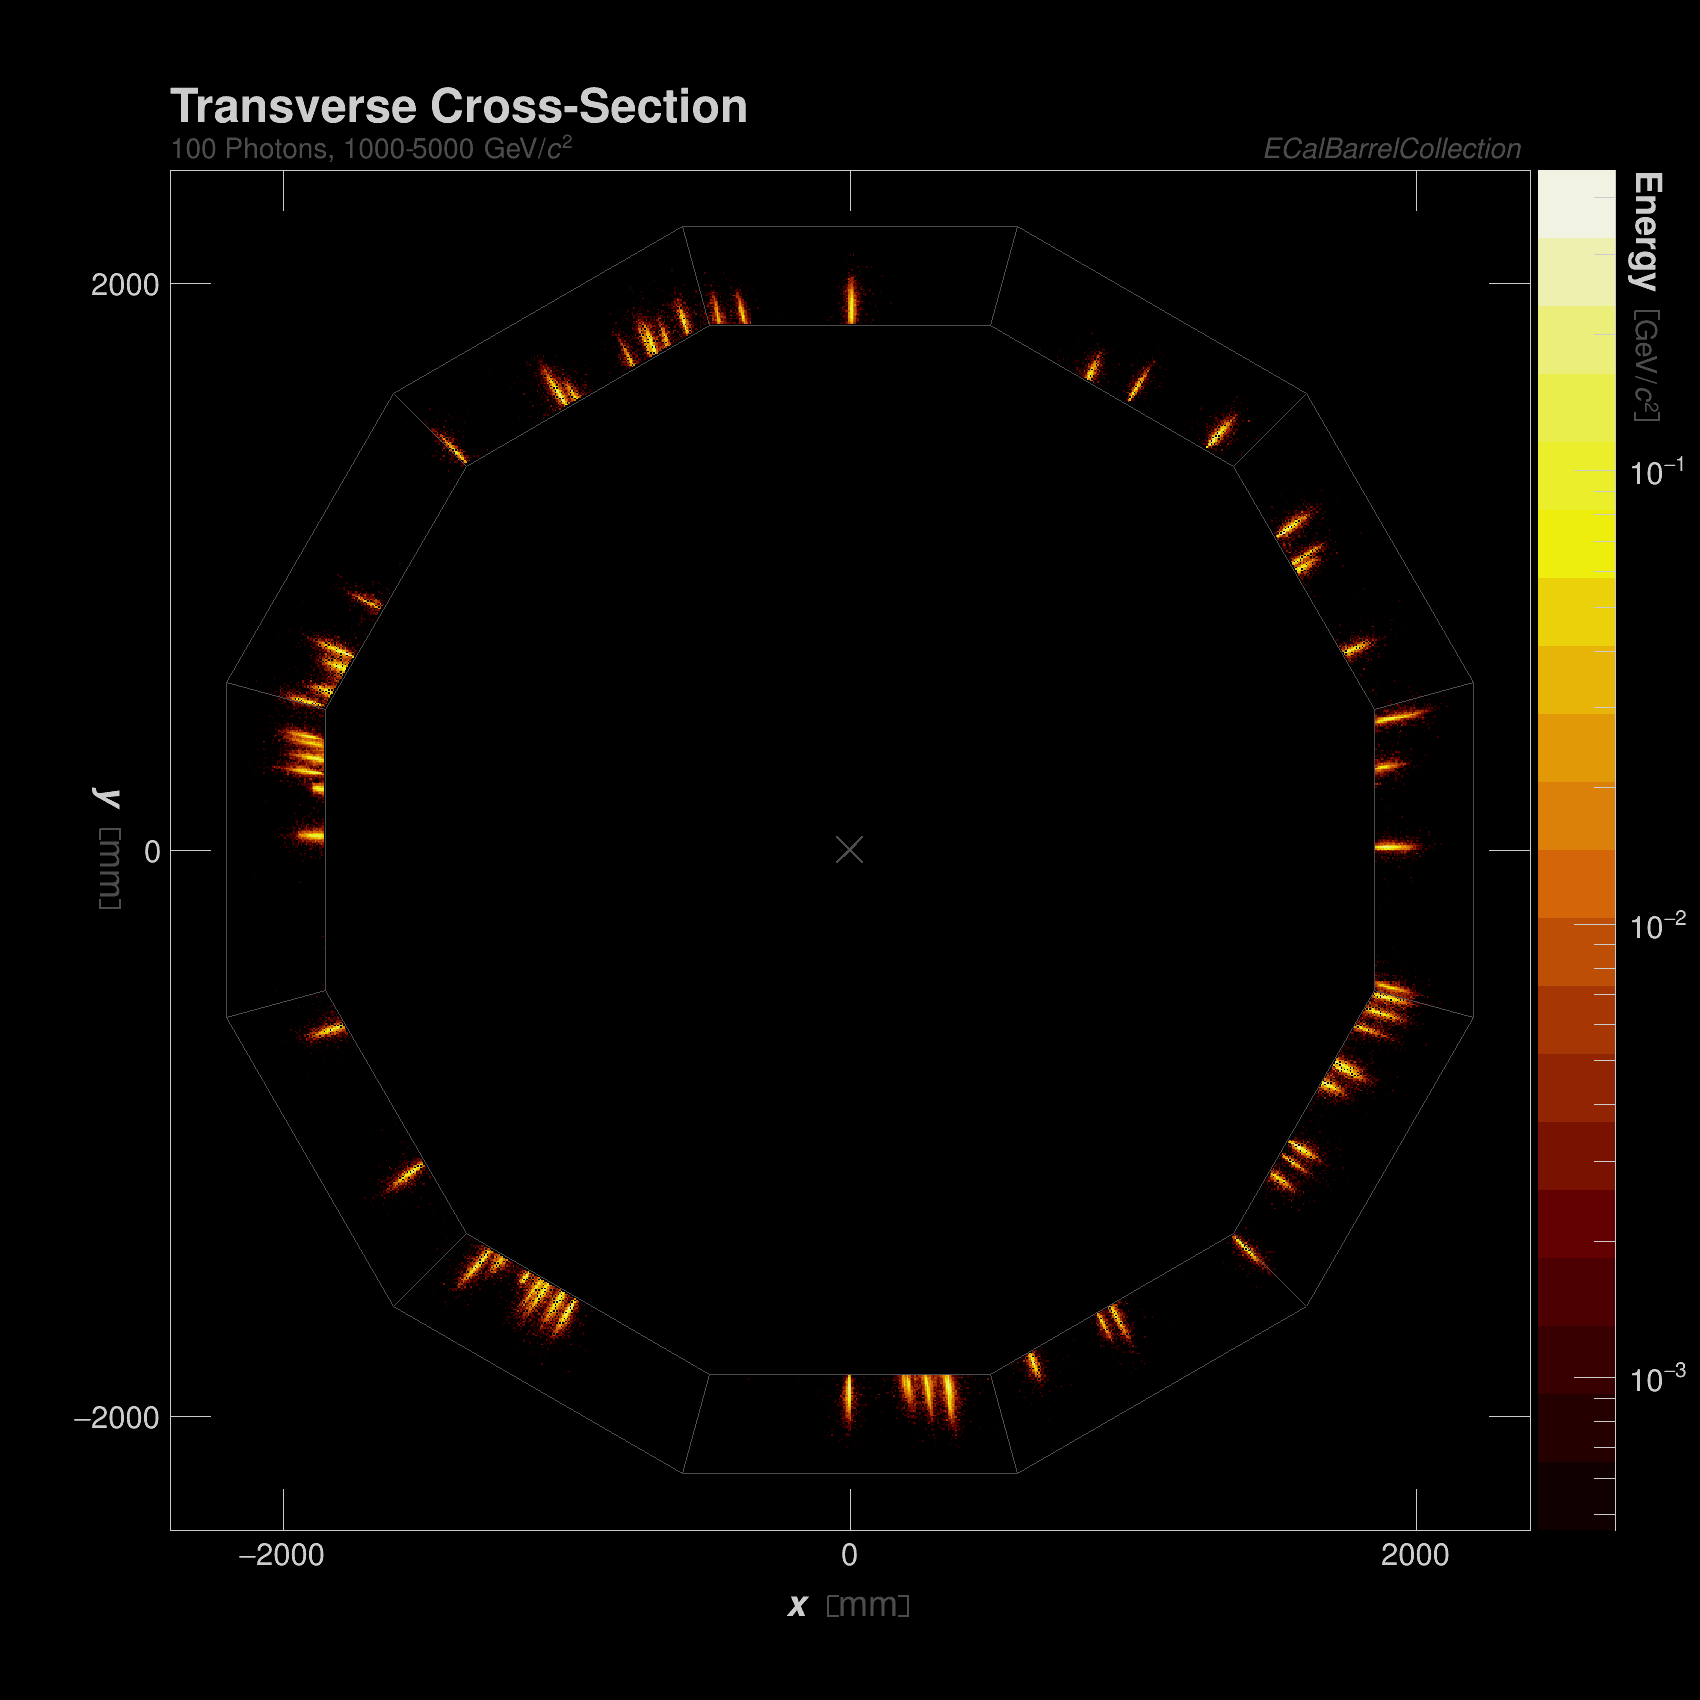

In [5]:
# %jsroot on

## DRAW HISTOGRAM ##
width = 600
height = width
h1.GetYaxis().CenterTitle()
h1.GetYaxis().RotateTitle()
h1.GetXaxis().CenterTitle()
h1.GetZaxis().SetTitle("#bf{Energy} #scale[.8]{#color[12]{#[]{Ge#kern[-.115]{V}#kern[.2]{/}#it{c}^{2}}}}")
h1.GetZaxis().SetTitleOffset(0.5)
h1.GetZaxis().RotateTitle()

# smoothing=1
# for n in range(smoothing):
#     h1.Smooth(1, "k3a")


c = ROOT.TCanvas("c1", "2-D Histograms", width, height)
c.GetPad(0).SetLogz()
c.SetBatch()
c.SetCanvasSize(2800, 2800)
h1.Draw("COL Z PLC")
h1.Draw("same axis x+ y+")
c.SetRealAspectRatio()

title = ROOT.TLatex()
title.SetTextColor(17)
title.SetTextSize(.03)
title.SetTextAlign(11)
title.DrawLatexNDC(0.1, 0.928, "T#kern[-.015]{ransverse}#kern[-.6]{ }Cross-Section")
subtitle = ROOT.TLatex()
subtitle.SetTextColor(12)
subtitle.SetTextSize(.018)
subtitle.SetTextAlign(11)
subtitle.DrawLatexNDC(0.1, 0.907, "#bf{100 Photons, 1000-#kern[-.15]{5000} Ge#kern[-.17]{V}/#kern[-.07]{#it{c}^{2}}}")

collection = ROOT.TLatex()
collection.SetTextColor(12)
collection.SetTextSize(.018)
collection.SetTextAlign(31)
collection.DrawLatexNDC(0.9, 0.907, "#bf{#it{ECalBarrelCollection}}")

                    
# Define Dodecagon parameters
NUM_VERTICES = 12

center = [0.5, 0.5]
radius_inner = 0.3192  # NDC
radius_outer = 0.38

# Define points for all volumes
vertices = []
for i in range(NUM_VERTICES):
    rotation = i * 2 * PI / NUM_VERTICES  # Rotate by 30 degrees for each volume

    inner_vertices = [[center[0] + radius_inner * np.cos(rotation + 2 * PI * n / NUM_VERTICES) for n in range(NUM_VERTICES)],
                      [center[1] + radius_inner * np.sin(rotation + 2 * PI * n / NUM_VERTICES) for n in range(NUM_VERTICES)]]
    outer_vertices = [[center[0] + radius_outer * np.cos(rotation + 2 * PI * n / NUM_VERTICES) for n in range(NUM_VERTICES)],
                      [center[1] + radius_outer * np.sin(rotation + 2 * PI * n / NUM_VERTICES) for n in range(NUM_VERTICES)]]

    # Rotate entire wireframe by PI/12
    rotated_inner_vertices = [[center[0] + (x - center[0]) * np.cos(PI / 12) - (y - center[1]) * np.sin(PI / 12) for x, y in zip(inner_vertices[0], inner_vertices[1])],
                               [center[1] + (x - center[0]) * np.sin(PI / 12) + (y - center[1]) * np.cos(PI / 12) for x, y in zip(inner_vertices[0], inner_vertices[1])]]
    rotated_outer_vertices = [[center[0] + (x - center[0]) * np.cos(PI / 12) - (y - center[1]) * np.sin(PI / 12) for x, y in zip(outer_vertices[0], outer_vertices[1])],
                               [center[1] + (x - center[0]) * np.sin(PI / 12) + (y - center[1]) * np.cos(PI / 12) for x, y in zip(outer_vertices[0], outer_vertices[1])]]

    vertices.extend([(rotated_inner_vertices[0][0], rotated_inner_vertices[1][0]),
                     (rotated_inner_vertices[0][1], rotated_inner_vertices[1][1]),
                     (rotated_outer_vertices[0][1], rotated_outer_vertices[1][1]),
                     (rotated_outer_vertices[0][0], rotated_outer_vertices[1][0]),
                     (rotated_inner_vertices[0][0], rotated_inner_vertices[1][0])])  # Close the loop

# Create TPolyLine
line = ROOT.TPolyLine(len(vertices))
line.SetLineColor(12)
line.SetLineWidth(1)
line.SetNDC()

# Set points for TPolyLine
for i, (x, y) in enumerate(vertices):
    line.SetPoint(i, x, y)

# Draw TPolyLine
line.Draw("SAME")

# Crosshair
size = 0.01
rotate = PI/4
crosshair = ROOT.TPolyLine()
crosshair.SetLineColor(12)
crosshair.SetLineWidth(2)
crosshair.SetNDC()
crosshair.SetNextPoint(0.5, 0.5)
crosshair.SetNextPoint(0.5+size*np.sin(PI/4), 0.5+size*np.sin(PI/4))
crosshair.SetNextPoint(0.5-size*np.sin(PI/4), 0.5-size*np.sin(PI/4))
crosshair.SetNextPoint(0.5, 0.5)
crosshair.SetNextPoint(0.5+size*np.sin(PI/4), 0.5-size*np.sin(PI/4))
crosshair.SetNextPoint(0.5-size*np.sin(PI/4), 0.5+size*np.sin(PI/4))
crosshair.Draw("SAME")


# x = [(center[0] + radius_inner*np.cos(PI/6 * n + PI/12)) for n in range(12)]
# y = [(center[1] + radius_inner*np.sin(PI/6 * n + PI/12)) for n in range(12)]
# wireframe_detector = ROOT.TPolyLine()
# wireframe_detector.SetLineColor(17)
# wireframe_detector.SetLineWidth(1)
# wireframe_detector.SetNDC()
# for n in range(12):
#     wireframe_detector.SetNextPoint(x[n], y[n])
# wireframe_detector.SetNextPoint(x[0], y[0])
# wireframe_detector.Draw("SAME F")

c.Draw()